# Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Statements

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/udemy data science/Nobel+Prize+Analysis+Start/nobel_prize_data.csv')

# Data Exploration & Cleaning

First of all we want to know:
* What is the shape of the dataframe? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [ ]:
df_data.shape

(962, 16)

Rows = 962, Columns: 16

In [ ]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


Earlest year: 1901

In [ ]:
df_data.sort_values(['year'], ascending=False).head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR
955,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Charles M. Rice,1952-08-25,"Sacramento, CA",United States of America,United States of America,Male,Rockefeller University,"New York, NY",United States of America,USA
950,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Emmanuelle Charpentier,1968-12-11,Juvisy-sur-Orge,France,France,Female,Max-Planck-Institut,Berlin,Germany,FRA
951,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Jennifer A. Doudna,1964-02-19,"Washington, DC",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
952,2020,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for improvements to auction theory and invent...,1/2,Individual,Paul R. Milgrom,1948-04-20,"Detroit, MI",United States of America,United States of America,Male,Stanford University,"Stanford, CA",United States of America,USA


Lastest year: 2020

## Clean
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column?
* Why do these columns have NaN values?  

### Check for Duplicates

In [ ]:
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any duplicates? False


### Check for NaN Values

In [ ]:
print(f'Any NaN values among the data? {df_data.isna().values.any()}')

Any NaN values among the data? True


In [ ]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

We observe that there's a lot of missing values within the organizations, including some gaps in the birth_date column. Let's dive deeper into this matter.

First let's take a look why there is NA values in the birth_date column by filtering necessary columns that associated with NA birth_date.

In [ ]:
col_subset = ['year', 'category', 'laureate_type', 'birth_date', 'full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


Here we can see that all of them have a laureate type of organization which is logical since organization do not necessary require a birth_date.

Furthermore, in the organization_name column, we also observe that all entries are marked as NA. This is because they have already provided their names in the fullname column. While this is true for laureate-type organizations, let's examine whether the same applies to individuals.

In [ ]:
df_data.loc[df_data.organization_name.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
1,1901,Literature,Individual,1839-03-16,Sully Prudhomme,NaN
3,1901,Peace,Individual,1822-05-20,Frédéric Passy,NaN
4,1901,Peace,Individual,1828-05-08,Jean Henry Dunant,NaN
7,1902,Literature,Individual,1817-11-30,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,1843-05-21,Charles Albert Gobat,NaN
...,...,...,...,...,...,...
932,2018,Peace,Individual,1993-07-02,Nadia Murad,NaN
942,2019,Literature,Individual,1942-12-06,Peter Handke,NaN
946,2019,Peace,Individual,1976-08-15,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,1943-04-22,Louise Glück,NaN


Now we see on an individual level, nobel prize winners that don't have an organization name are mostly specialized in Peace and Literature.

### Type Conversions


* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_%` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [ ]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

#### Add a Column with the Prize Share as a Percentage

As the Nobel Prize values are presented in ratio format (e.g., 1/2), we need to generate a new column indicating the prize share in percentage format for convenience in analysis.

In [ ]:
separated_values = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
df_data['share_%'] = numerator/denomenator

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

In [ ]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_%
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50


# Analysis
After we explore and clean the data now let's get into the analytical part of this analysis.



## Who won the nobel prizes?
Initially, we are interested in identifying the Nobel Prize winners. We seek to ascertain the dominant gender, their geographical origins, affiliations with organizations, and other relevant details.

### Plotly Donut Chart: Percentage of Male vs. Female Laureates

Create a donut chart which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [ ]:
gender = df_data.sex.value_counts()
gender

Male      876
Female     58
Name: sex, dtype: int64

In [ ]:
fig = px.pie(
    labels = gender.index,
    values = gender.values,
    title = 'Percentage of Male vs Female winners',
    names = gender.index,
    hole = 0.4
)
fig.update_traces(
    textposition = 'inside',
    textfont_size = 15,
    textinfo = 'percent'
)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


### Who were the first 3 Women to Win the Nobel Prize?

* What are the names of the first 3 female Nobel laureates?
* What did the win the prize for?
* What do you see in their `birth_country`? Were they part of an organisation?

In [ ]:
df_data[df_data['sex']=='Female'].sort_values('year', ascending=True)[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_%
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


### Find the Repeat Winners

Did some people get a Nobel Prize more than once? If so, who were they?

In [ ]:
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[is_winner]
print(f'There are {multiple_winners.full_name.nunique()} winners who were awarded the prize more than once.')

There are 6 winners who were awarded the prize more than once.


In [ ]:
multiple_winners.full_name.value_counts()

Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Marie Curie, née Sklodowska                                                          2
Linus Carl Pauling                                                                   2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Name: full_name, dtype: int64

Out of the 6 repeat winner 4 are individuals and 2 are organization.

## Number of Prizes
Next, we want to shift our study to the number of prizes won, categorized by gender, prize category, and the trend over time.

### Number of Prizes per Category

* In how many categories are prizes awarded?
* Which category has the most number of prizes awarded?
* Which category has the fewest number of prizes awarded?

In [ ]:
df_data.category.nunique()

6

In [ ]:
prizes_per_category = df_data.category.value_counts()
prizes_per_category

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

In [ ]:
v_bar = px.bar(
    x = prizes_per_category.index,
    y = prizes_per_category.values,
    color = prizes_per_category.values,
    color_continuous_scale = "Aggrnyl",
    title = "Number of Prizes Awarded per Category"
)
v_bar.update_layout(
    xaxis_title='Nobel Prize Category',
    coloraxis_showscale=False,
    yaxis_title= 'Number of Prizes'
)
v_bar.show()

* Why are there so few prizes in the field of economics?
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [ ]:
df_data[df_data.category == 'Economics'].sort_values('year')[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_%
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00


**Insight:** It seems that the Economics Nobel Prize was first awarded in 1969, which clarifies why there are relatively few winners in this specific field.

### Male and Female Winners by Category



In [ ]:
cat_men_women = df_data.groupby(
    ['category', 'sex'],
    as_index = False
).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)
cat_men_women

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [ ]:
v_bar_split = px.bar(
    x = cat_men_women.category,
    y = cat_men_women.prize,
    color = cat_men_women.sex,
    title = "Number of Prizes Awarded per Category split by Men and Women"
)
v_bar_split.update_layout(
    xaxis_title = "Nobel Prize Category",
    yaxis_title = "Number of Prizes"
)
v_bar_split.show()

**Insight:** There is a noticeable disparity among categories such as Physics, Chemistry, and Economics. Despite an overall imbalance across all categories, there is a higher representation of women in fields like Medicine, Literature, and Peace.

### Number of Prizes Awarded Over Time

Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.

In [ ]:
prize_per_year = df_data.groupby(by='year').count().prize

In [ ]:
moving_average = prize_per_year.rolling(window=5).mean()

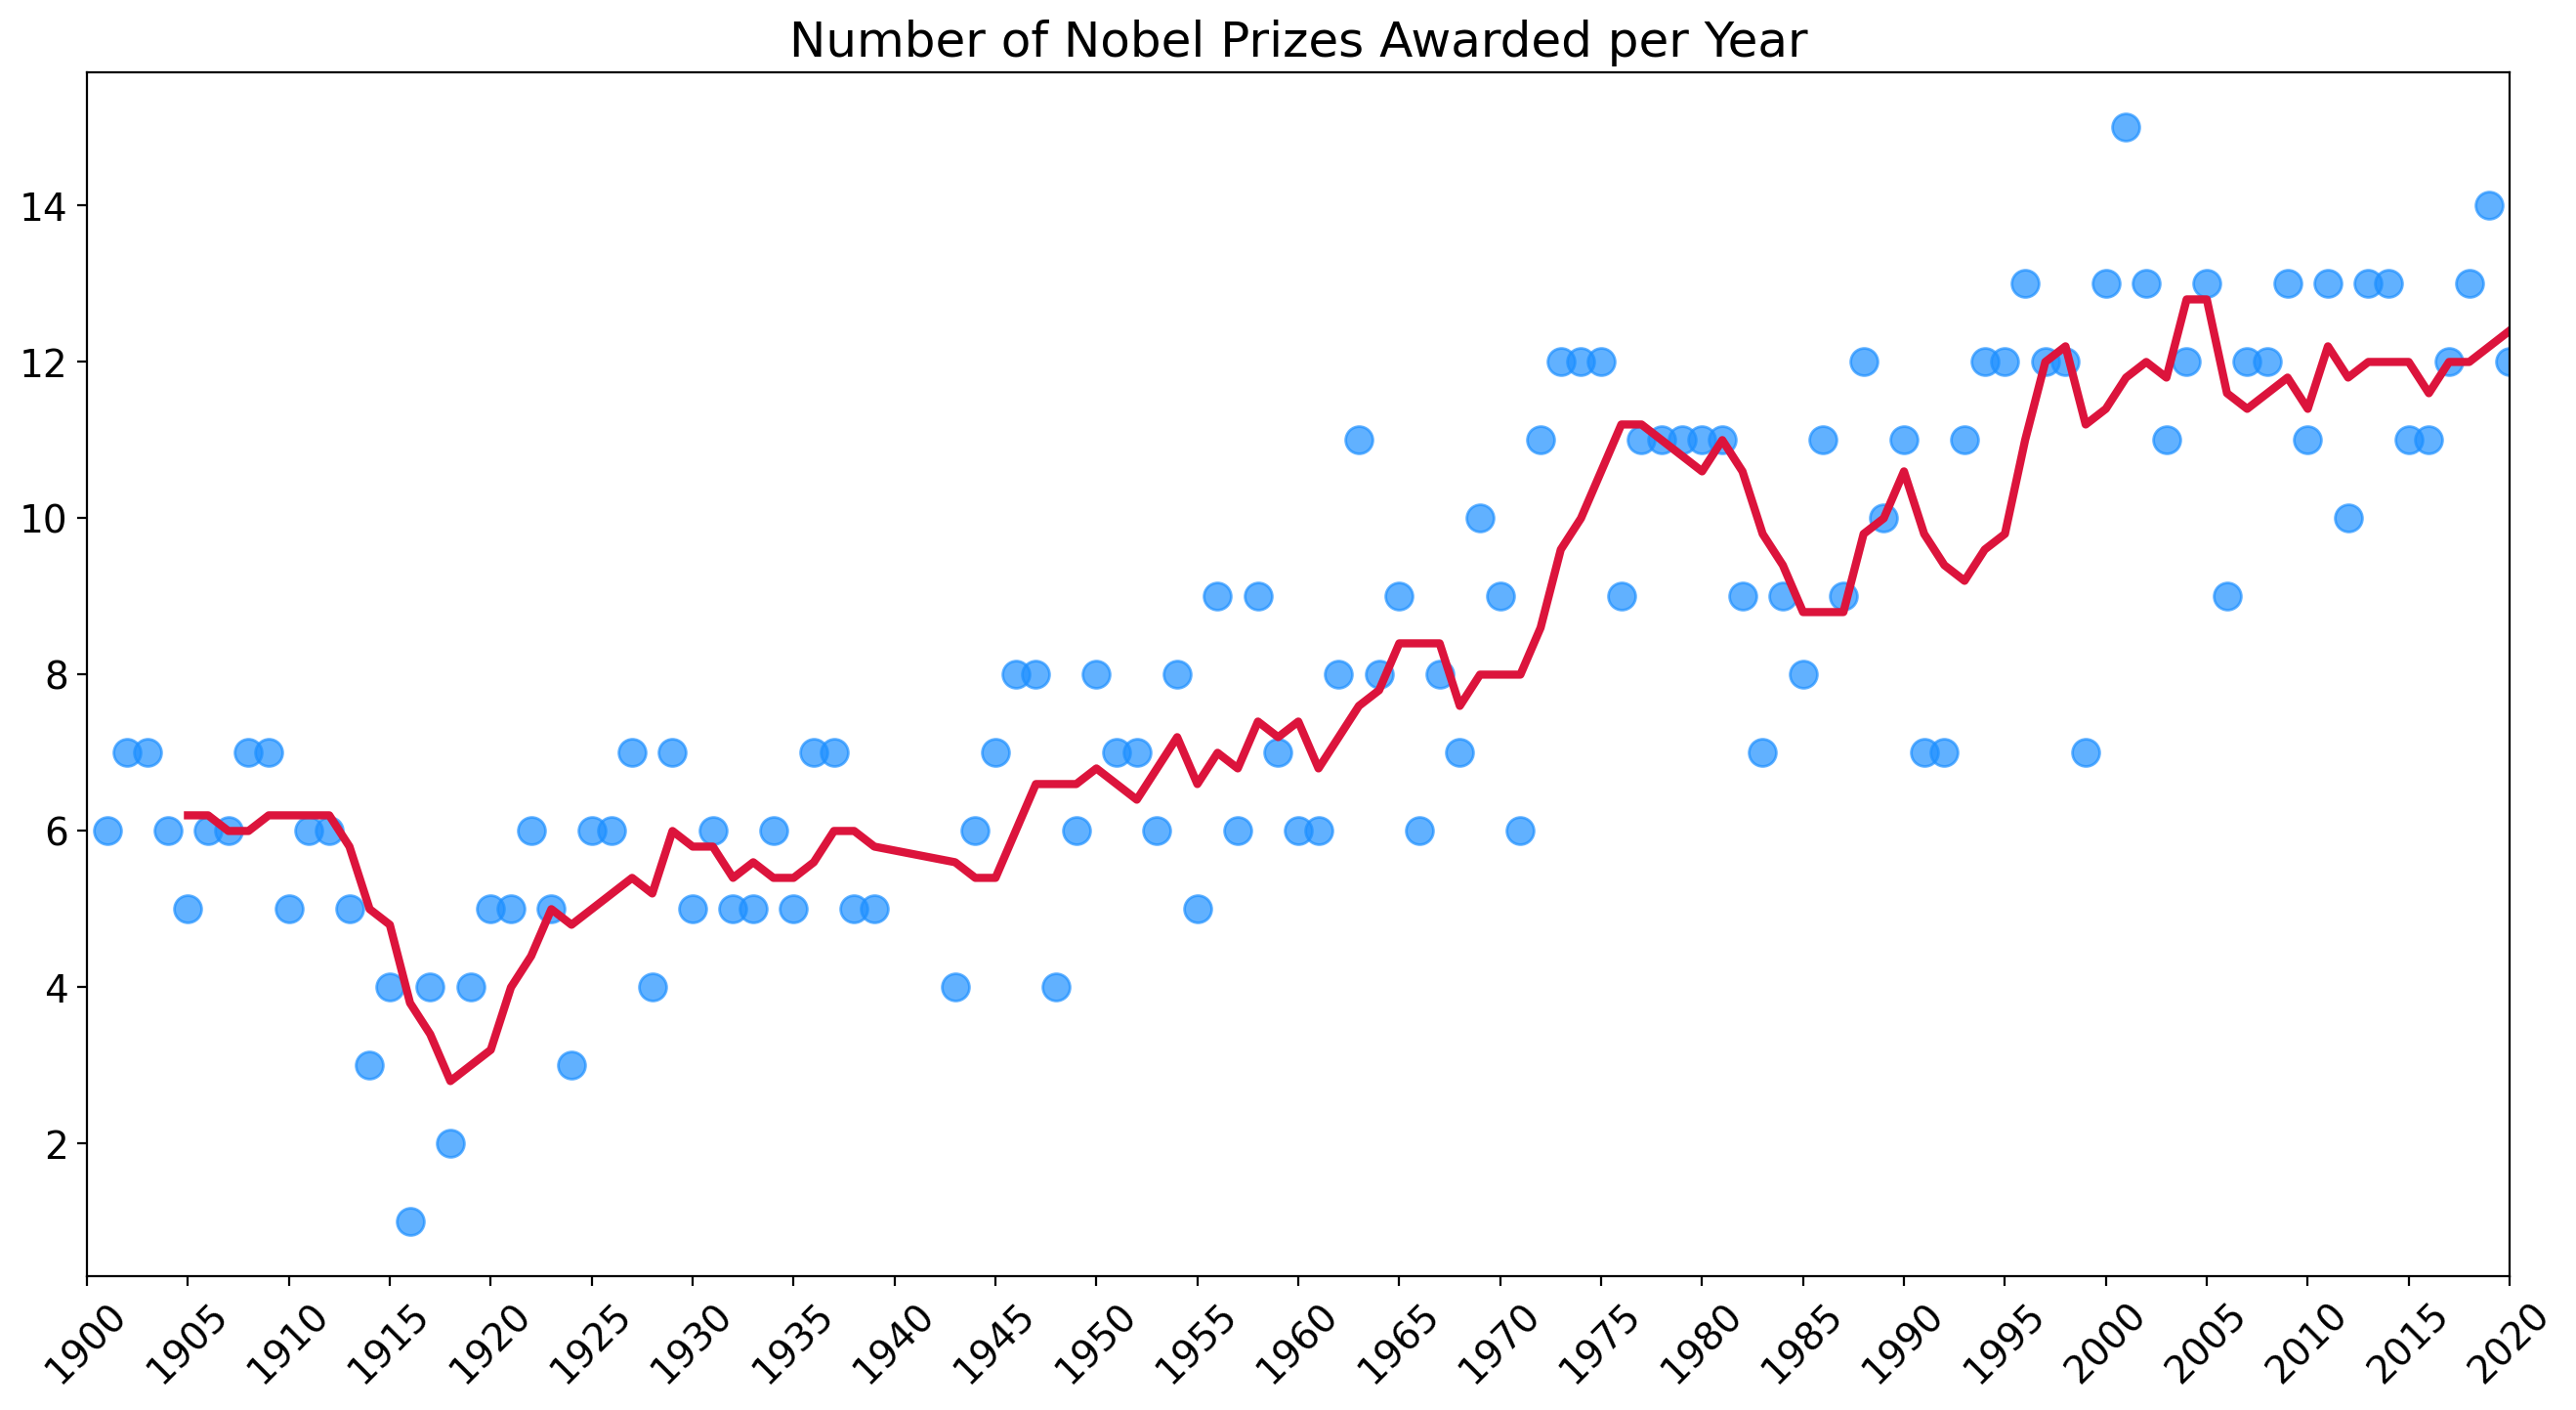

In [ ]:
plt.figure(figsize = (16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize= 18)
plt.yticks(fontsize = 14)
plt.xticks(ticks = np.arange(1900, 2021, step = 5),
           fontsize = 14,
           rotation = 45)
ax = plt.gca()
ax.set_xlim(1900, 2020)
ax.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    c='dodgerblue',
    alpha = 0.7,
    s=100
)
ax.plot(
    prize_per_year.index,
    moving_average.values,
    c='crimson',
    linewidth= 3
)
plt.show()

**Insight:** The graph indicates a general upward trend in the number of Nobel Prize winners. However, there seem to be gaps in the data during 1914-1918 and 1939-1945, corresponding to the World Wars, as evidenced by the absence of blue dots during these periods.

### Are More Prizes Shared Than Before?

Investigate if more prizes are shared than before.

In [ ]:
yearly_avg_prize = df_data.groupby(by='year').agg({'share_%': pd.Series.mean})
share_prize_mavg = yearly_avg_prize.rolling(window=5).mean()

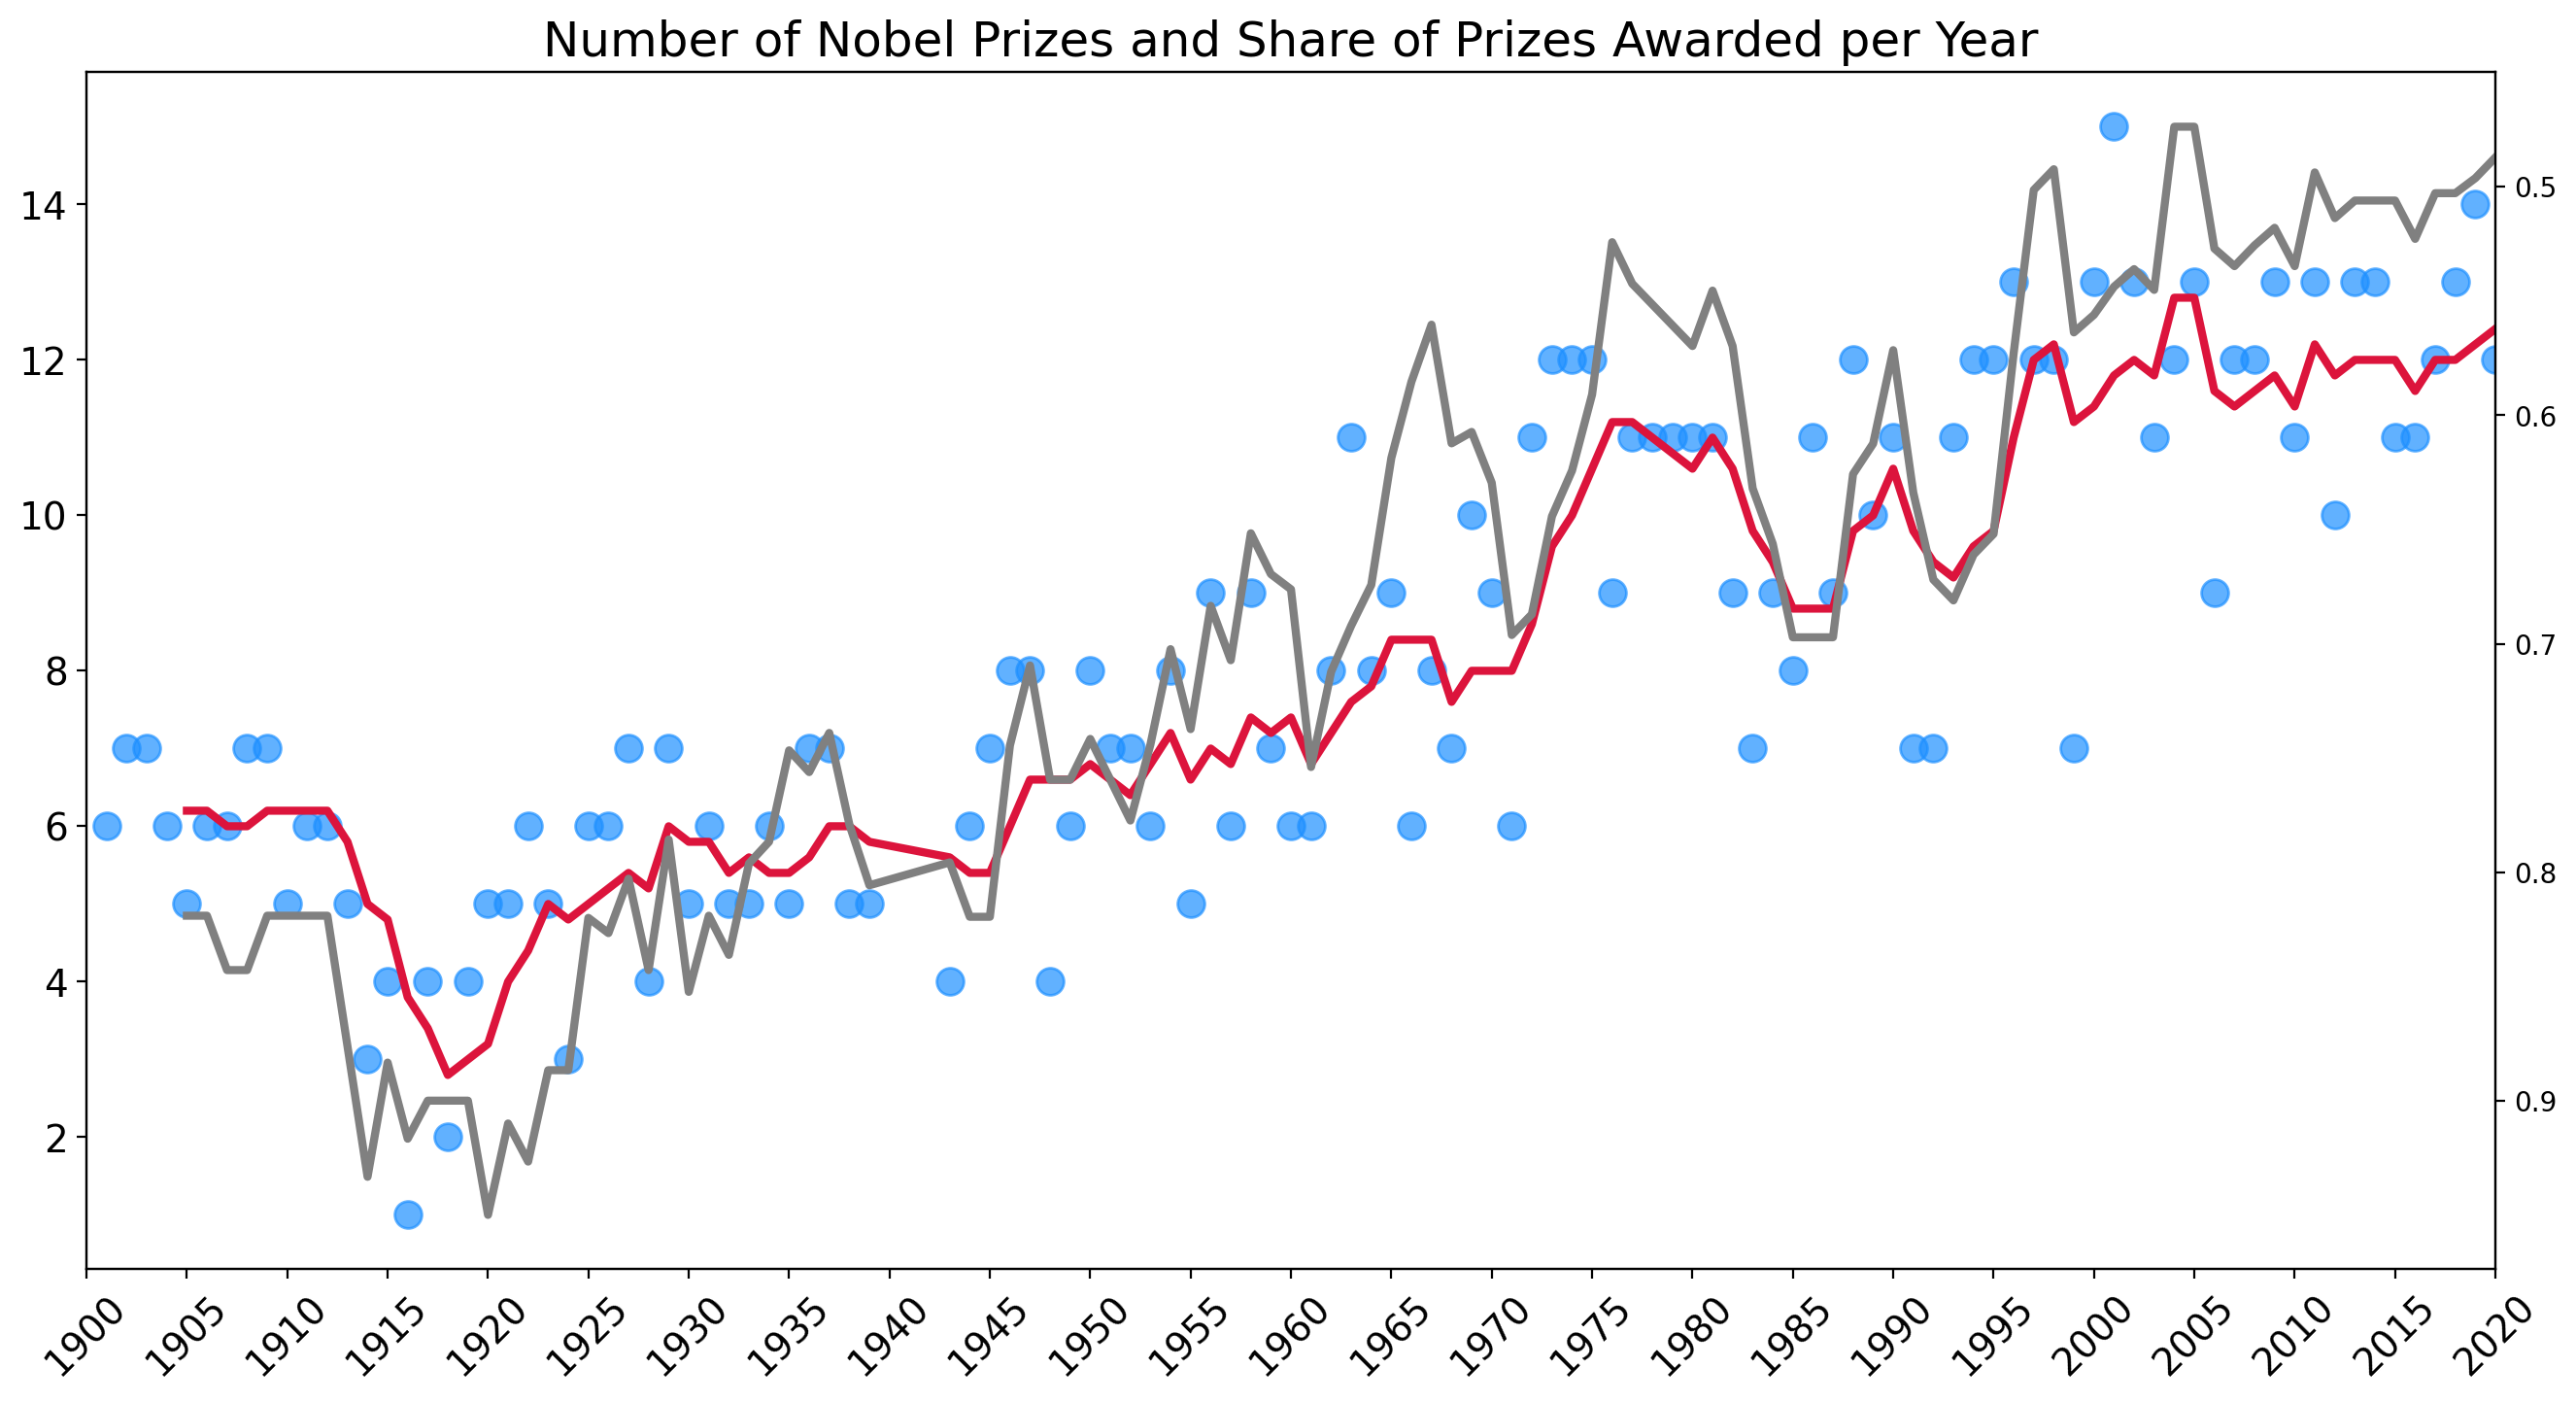

In [ ]:
plt.figure(figsize = (16,8), dpi=200)
plt.title('Number of Nobel Prizes and Share of Prizes Awarded per Year', fontsize= 18)
plt.yticks(fontsize = 14)
plt.xticks(ticks = np.arange(1900, 2021, step = 5),
           fontsize = 14,
           rotation = 45)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)

ax2.invert_yaxis()

ax1.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    c='dodgerblue',
    alpha = 0.7,
    s=100
)
ax1.plot(
    prize_per_year.index,
    moving_average.values,
    c='crimson',
    linewidth= 3
)

ax2.plot(
    prize_per_year.index,
    share_prize_mavg.values,
    c='grey',
    linewidth=3
)
plt.show()

**Insight:** The data reveals a consistent upward trajectory in both the quantity and the proportion of Nobel Prizes awarded. It is noteworthy that the introduction of the Economics category in 1969 resulted in a substantial surge in both the number of prizes and their overall share.

# The Countries with the Most Nobel Prizes

Now we want to compare the number of nobel prize winner across different countries. Noted, that there's 3 columns that indicates countries: `birth_country`, `birth_country_current` and `organization_country`.
However, for this analysis we choose to use the `birth_country_current` column for analyzing the number of Nobel Prize winners across different countries, considering the limitations of the other columns. However, it's essential to acknowledge that even `birth_country_current` has its own limitations, as individuals' nationalities can change over time due to factors like emigration, acquiring different citizenship, or marriage in different countries. Despite these challenges, using `birth_country_current` provides a more contemporary and relevant basis for our analysis.

In [ ]:
top_countries = df_data.groupby(['birth_country_current'], as_index = False).agg({'prize': pd.Series.count})
top_countries.sort_values(by='prize', inplace = True)

In [ ]:
top20_countries = top_countries[-20:]
top20_countries

,birth_country_current,prize
7,Belgium,9
31,Hungary,9
33,India,9
2,Australia,10
20,Denmark,12
54,Norway,12
13,China,12
51,Netherlands,18
3,Austria,18
39,Italy,19


In [ ]:
h_bar = px.bar(
    x= top20_countries.prize,
    y=top20_countries.birth_country_current,
    orientation = 'h',
    color = top20_countries.prize,
    color_continuous_scale= 'Viridis',
    title = 'Top 20 Countries by Number of Prizes',
)

h_bar.update_layout(
    xaxis_title = 'Number of Prizes',
    yaxis_title = 'Country',
    coloraxis_showscale = False
)

h_bar.show()

**Insight:** Wow, we can see that **USA** have a massive lead over other countries. In second place we have **United Kingdom** followed by **Germany** in third.

### Number of Prizes by Country in Map

In [ ]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'], as_index = False).agg({'prize': pd.Series.count})

In [ ]:
df_countries.sort_values(by='prize', ascending=False)

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
32,Iceland,ISL,1
47,Madagascar,MDG,1
34,Indonesia,IDN,1
36,Iraq,IRQ,1


In [ ]:
world_map = px.choropleth(
    df_countries,
    locations = 'ISO',
    color = 'prize',
    hover_name = 'birth_country_current',
    color_continuous_scale = px.colors.sequential.matter
)
world_map.update_layout(
    coloraxis_showscale = True
)
world_map.show()

### A closer look into each categories for each different countries.


In [ ]:
cat_country = df_data.groupby(['birth_country_current', 'category'], as_index = False).agg({'prize': pd.Series.count})

In [ ]:
cat_country.sort_values(by='prize', ascending=False, inplace = True)

In [ ]:
merged_df = pd.merge(cat_country, top20_countries, on='birth_country_current')
merged_df.columns=['country', 'category', 'cat_prize', 'total_prize']
merged_df.sort_values('total_prize', inplace = True)

In [ ]:
cat_country_bar = px.bar(
    x = merged_df.cat_prize,
    y = merged_df.country,
    color = merged_df.category,
    orientation = 'h',
    title = 'Top 20 countries by Number of Prize and Category'
)
cat_country_bar.update_layout(xaxis_title = 'Number of Prizes', yaxis_title = 'Country')
cat_country_bar.show()

**Insight:** The bar graph visually demonstrates the remarkable dominance of the USA in winning Nobel Prizes, particularly in the field of economics, where it has accumulated a total of 49 prizes. In comparison, the UK and Germany lag significantly behind with 8 and 1 respectively in this category. Across all six categories, the USA emerges as a dominant force, except in literature. Interestingly, despite having nearly five times the number of Nobel Prizes compared to France overall, the USA falls slightly short in literature prizes, with 10 compared to France's 11.

In [ ]:
prize_by_year = df_data.groupby(['birth_country_current', 'year'], as_index = False).count()

In [ ]:
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

In [ ]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace = True)
cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [ ]:
l_chart = px.line(cumulative_prizes,
                  x = 'year',
                  y = 'prize',
                  color = 'birth_country_current',
                  hover_name = 'birth_country_current')

l_chart.update_layout(
    xaxis_title = 'Year',
    yaxis_title = 'Number of Prizes',
)

l_chart.show()

**Insight:** The graph provides a clear illustration of the trend for each country, highlighting the period when the USA began to assert dominance in Nobel Prize awards. A notable take-off in the number of prizes awarded to the USA occurred after World War II. By 1953, the USA took the lead for the first time, and from that point on, the number of prizes skyrocketed, surpassing other countries by a significant margin. This period marks a distinct shift in the distribution of Nobel Prizes, with the USA emerging as the frontrunner.

# Prize by organization, research cities and birth cities

### Which Organization Make the Most Discoveries?


In [ ]:
prize_by_org = df_data.groupby('organization_name', as_index= False).agg({'prize': pd.Series.count})
prize_by_org.sort_values(by='prize', inplace = True)

In [ ]:
top20_org = prize_by_org[-20:]

In [ ]:
bar = px.bar(
    top20_org,
    'prize',
    'organization_name',
    title = 'Top 20 organization by prize',
    orientation = 'h',
    color_continuous_scale= 'Viridis',
    color = 'prize',
)
bar.update_layout(
    xaxis_title = 'Numbe of Prizes',
    yaxis_title = 'Organization Name'
)
bar.show()

### Which Cities Make the Most Discoveries?

In [ ]:
top20_cities = df_data.organization_city.value_counts()[:20]
top20_cities.sort_values(inplace = True)

In [ ]:
cities_bar = px.bar(
    x = top20_cities.values,
    y = top20_cities.index,
    color = top20_cities.values,
    orientation = 'h',
    color_continuous_scale= px.colors.sequential.Plasma,
    title = 'Which Cities do the most Research?'
)
cities_bar.update_layout(
    xaxis_title = 'Number of Prizes',
    yaxis_title = 'Cities'
)
cities_bar.show()

### Where are Nobel Laureates Born?

In [ ]:
top20_birth_cities = df_data.birth_city.value_counts()[:20]
top20_birth_cities.sort_values(inplace = True)

In [ ]:
birth_cities_bar = px.bar(
    x = top20_birth_cities.values,
    y = top20_birth_cities.index,
    color = top20_birth_cities.values,
    orientation = 'h',
    color_continuous_scale= px.colors.sequential.Plasma,
    title = 'Which Cities do the Nobel Laureates born?'
)
birth_cities_bar.update_layout(
    xaxis_title = 'Number of Prizes',
    yaxis_title = 'Cities of Birth'
)
birth_cities_bar.show()

**Insight:** While it's reasonable to assume that cities with larger populations, such as New York, Paris, and London, would produce more Nobel Prize winners, the reality is more complex. Smaller cities like Vienna and Budapest also contribute significantly, suggesting that factors beyond population size, like academic infrastructure and cultural heritage. Additionally, it's noteworthy that many Nobel discoveries occur in cities like Cambridge (Massachusetts and UK), Stanford, and Berkeley, even though the winners may originate from different places, underscoring the global and collaborative nature of scientific advancements.

### Plotly Sunburst Chart: Combine Country, City, and Organisation



In [ ]:
country_city_org = df_data.groupby(
    ['organization_country','organization_city','organization_name'], as_index = False
).agg({'prize': pd.Series.count})
country_city_org.sort_values('prize', ascending = False, inplace = True)

In [ ]:
country_city_org

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [ ]:
burst = px.sunburst(
    country_city_org,
    path = ['organization_country', 'organization_city', 'organization_name'],
    values = 'prize',
    title = "Where do all of the discoveries take place?"
)
burst.update_layout(
    xaxis_title = "Number of Prizes",
    yaxis_title = "City",
    coloraxis_showscale = False
)
burst.show()

**Insights:** At a glance, it's evident that the USA occupies over 50% of the chart due to its high number of Nobel Prizes. Additionally, the data reveals a significant concentration of laureates in Paris, France, with most affiliated organizations being linked to Nobel Prize winners. The dominance of Cambridge and London in the UK is also apparent. This pattern suggests that well-developed cities and countries tend to have more Nobel Prize winners, potentially due to advantages in education, resources, and capital when compared to less affluent nations.


# Patterns in the Laureate Age at the Time of the Award

How old are the laureates when they win the prize?


In [ ]:
birth_years = df_data.birth_date.dt.year

In [ ]:
df_data['winning_age'] = df_data.year - birth_years

### Who were the oldest and youngest winners?
* What are the names of the youngest and oldest Nobel laureate?
* What did they win the prize for?


In [ ]:
display(df_data.nlargest(n=1, columns = 'winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_%,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00


In [ ]:
display(df_data.nsmallest(n=1, columns = 'winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_%,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00


**Insight:** A brief search confirms that the oldest Nobel Prize winner was John Goodenough, born in Jena, Germany, who achieved the honor in the field of Chemistry at the age of 97. Conversely, the youngest Nobel Prize laureate is Malala Yousafzai, born in Mingora, Pakistan, who remarkably received the prize at the age of 17 in the field of Peace.

### Descriptive Statistics for the Laureate Age at Time of Award

* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?

In [ ]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

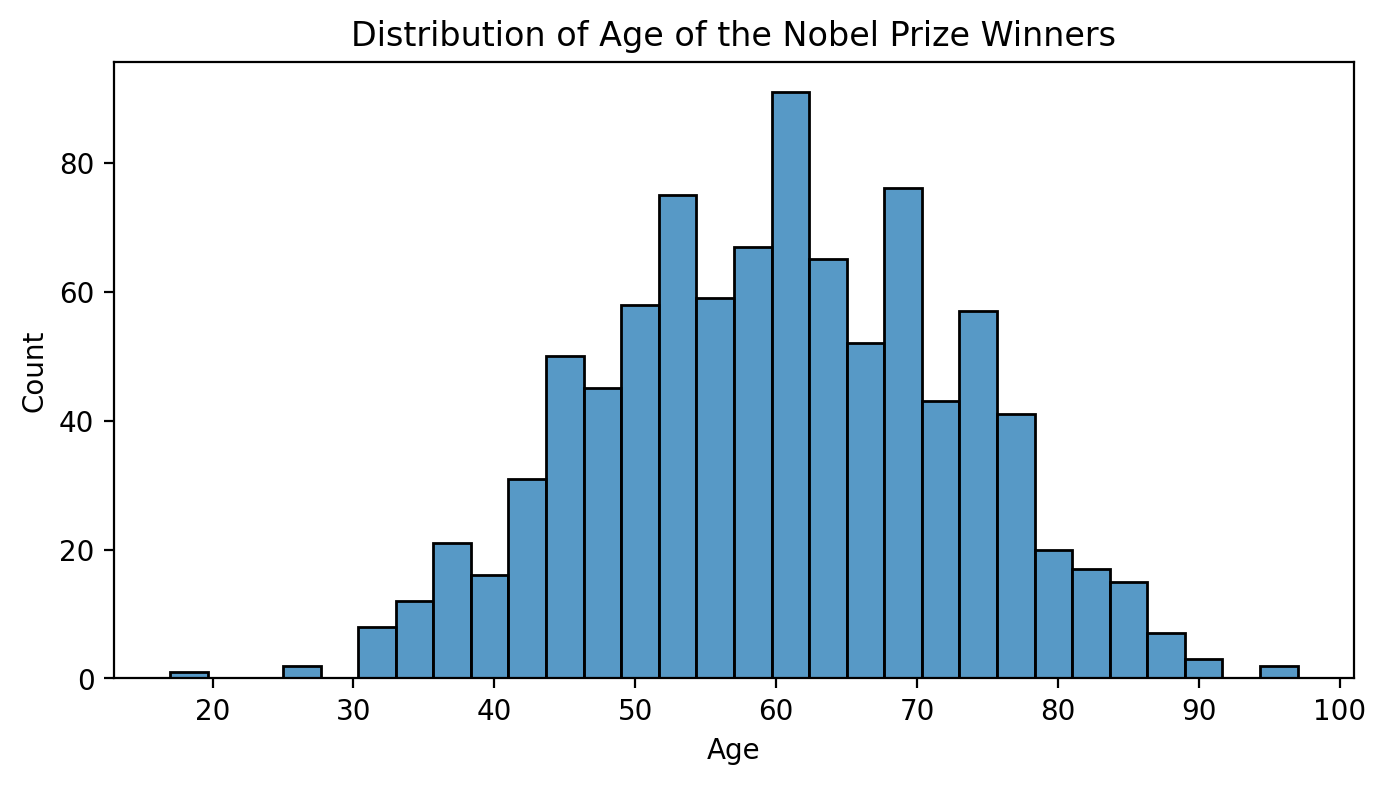

In [ ]:
plt.figure(figsize=(8,4), dpi = 200)
sns.histplot(
    data = df_data,
    x = df_data.winning_age,
    bins = 30
)
plt.xlabel('Age')
plt.title('Distribution of Age of the Nobel Prize Winners')
plt.show()

**Insight:** Based on the this histogram, it seems that the age distribution resemble a normal distribution, with an approximate mean around 59.95 or 60 years old. This suggests that, on average, Nobel Prize winners tend to be around the age of 60 years and the majority lie between the age of 50 and 70, forming a bell-shaped curve in the distribution.

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?



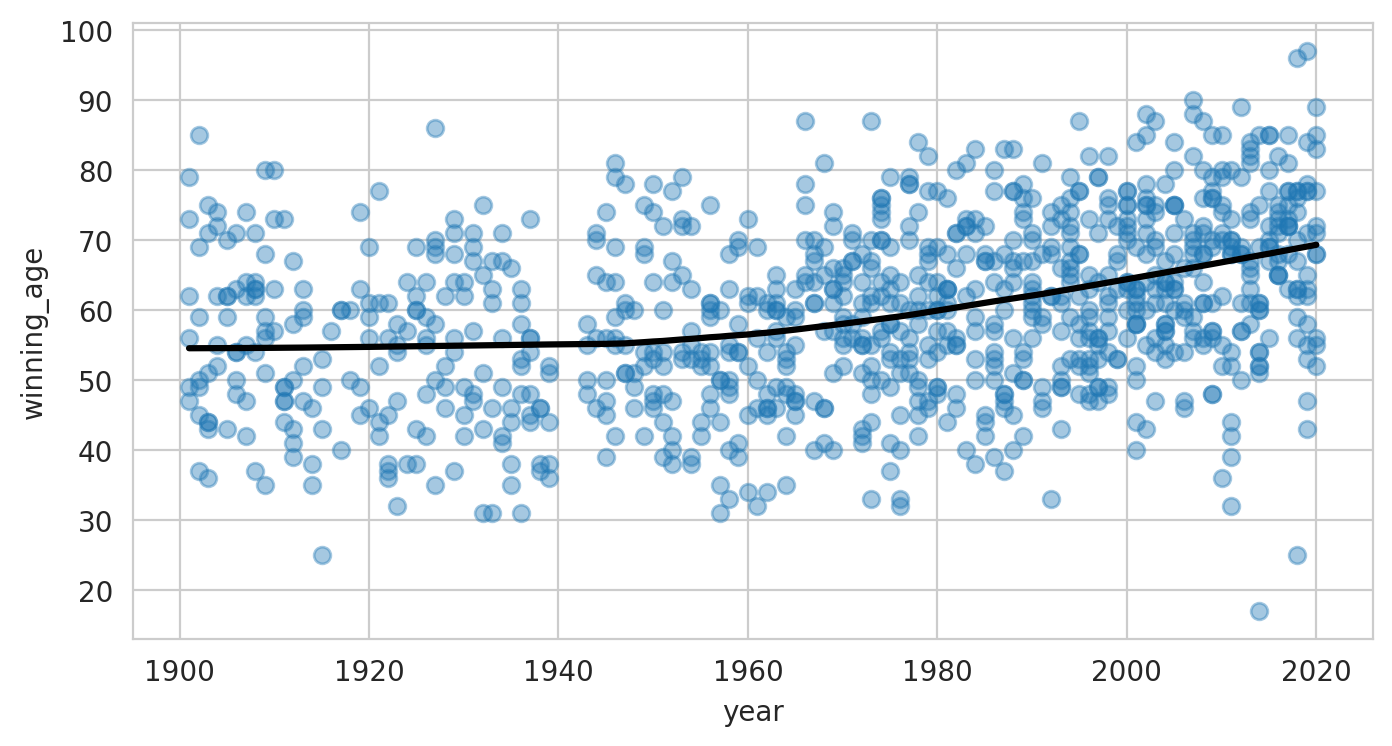

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(
      data= df_data,
      x ='year',
      y = 'winning_age',
      lowess= True,
      scatter_kws = {'alpha': 0.4},
      line_kws = {'color': 'black'}
  )
plt.show()

**Insight:** By tracing the black line, which represents the linear regression for this scatterplot, it becomes evident that from 1900 to 1950, the line appears relatively flat, indicating minimal change during that period. However, as we move forward in time, the line starts to ascend, suggesting that individuals are receiving or winning Nobel Prizes at later stages in life. Another crucial observation is that in recent years, the spread of the dots appears to widen, illustrating an increase in the number of both very young and very old winners. This trend indicates a shift in the age distribution of Nobel laureates over time, with more variability in the ages at which individuals are recognized for their achievements.

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?

* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

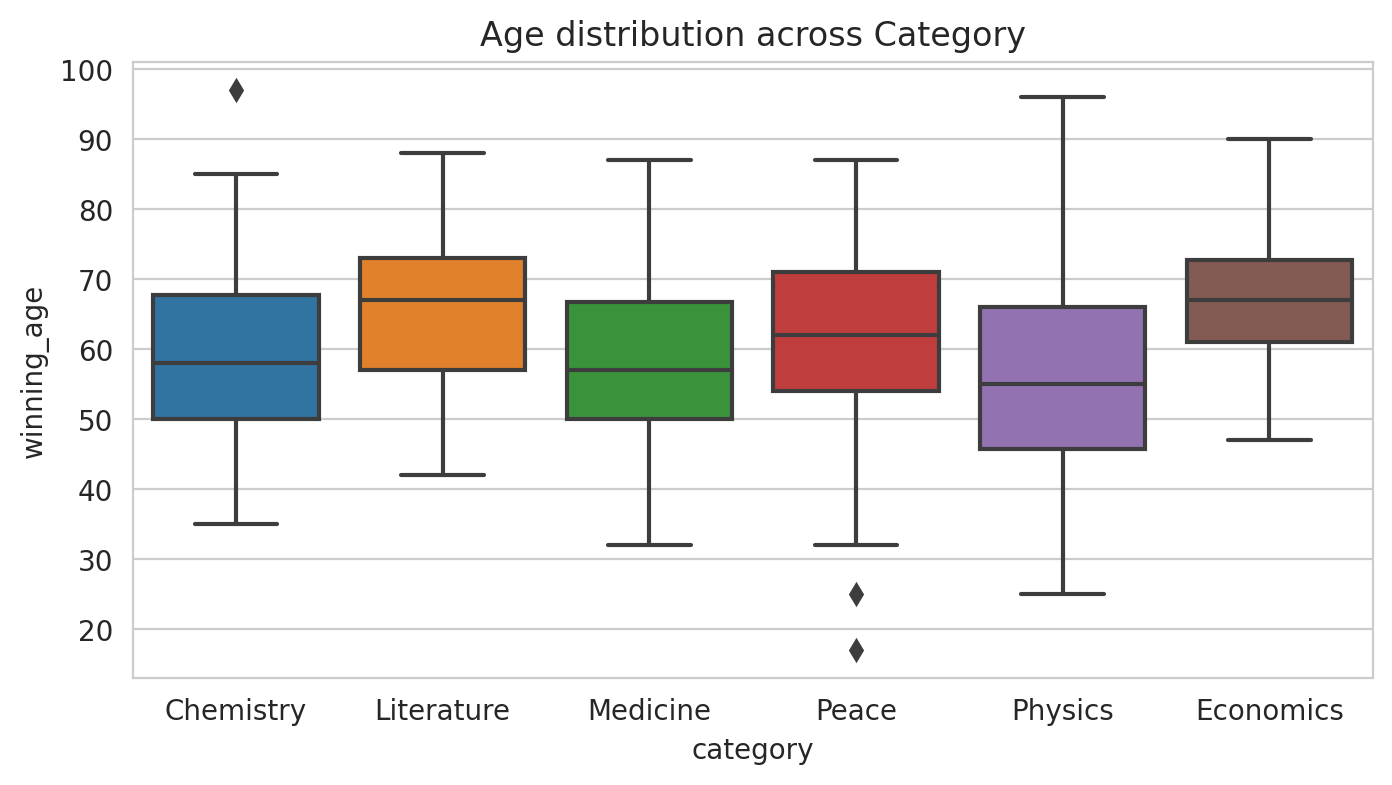

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.boxplot(
      data = df_data,
      x = 'category',
      y = 'winning_age'
  )
plt.title("Age distribution across Category")
plt.show()

**Insight:** Across the six categories, it's apparent that the age range of Physics Nobel Prize winners is the most diverse, spanning from 46 to 68 years old. In contrast, Economics Nobel Prize laureates tend to be older and condense, with the majority falling within the age range of 61 to 72 years old. This highlights distinct age patterns within different Nobel Prize categories, suggesting varying career trajectories and recognition timelines in these fields.

### Identifying trends in each category
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?



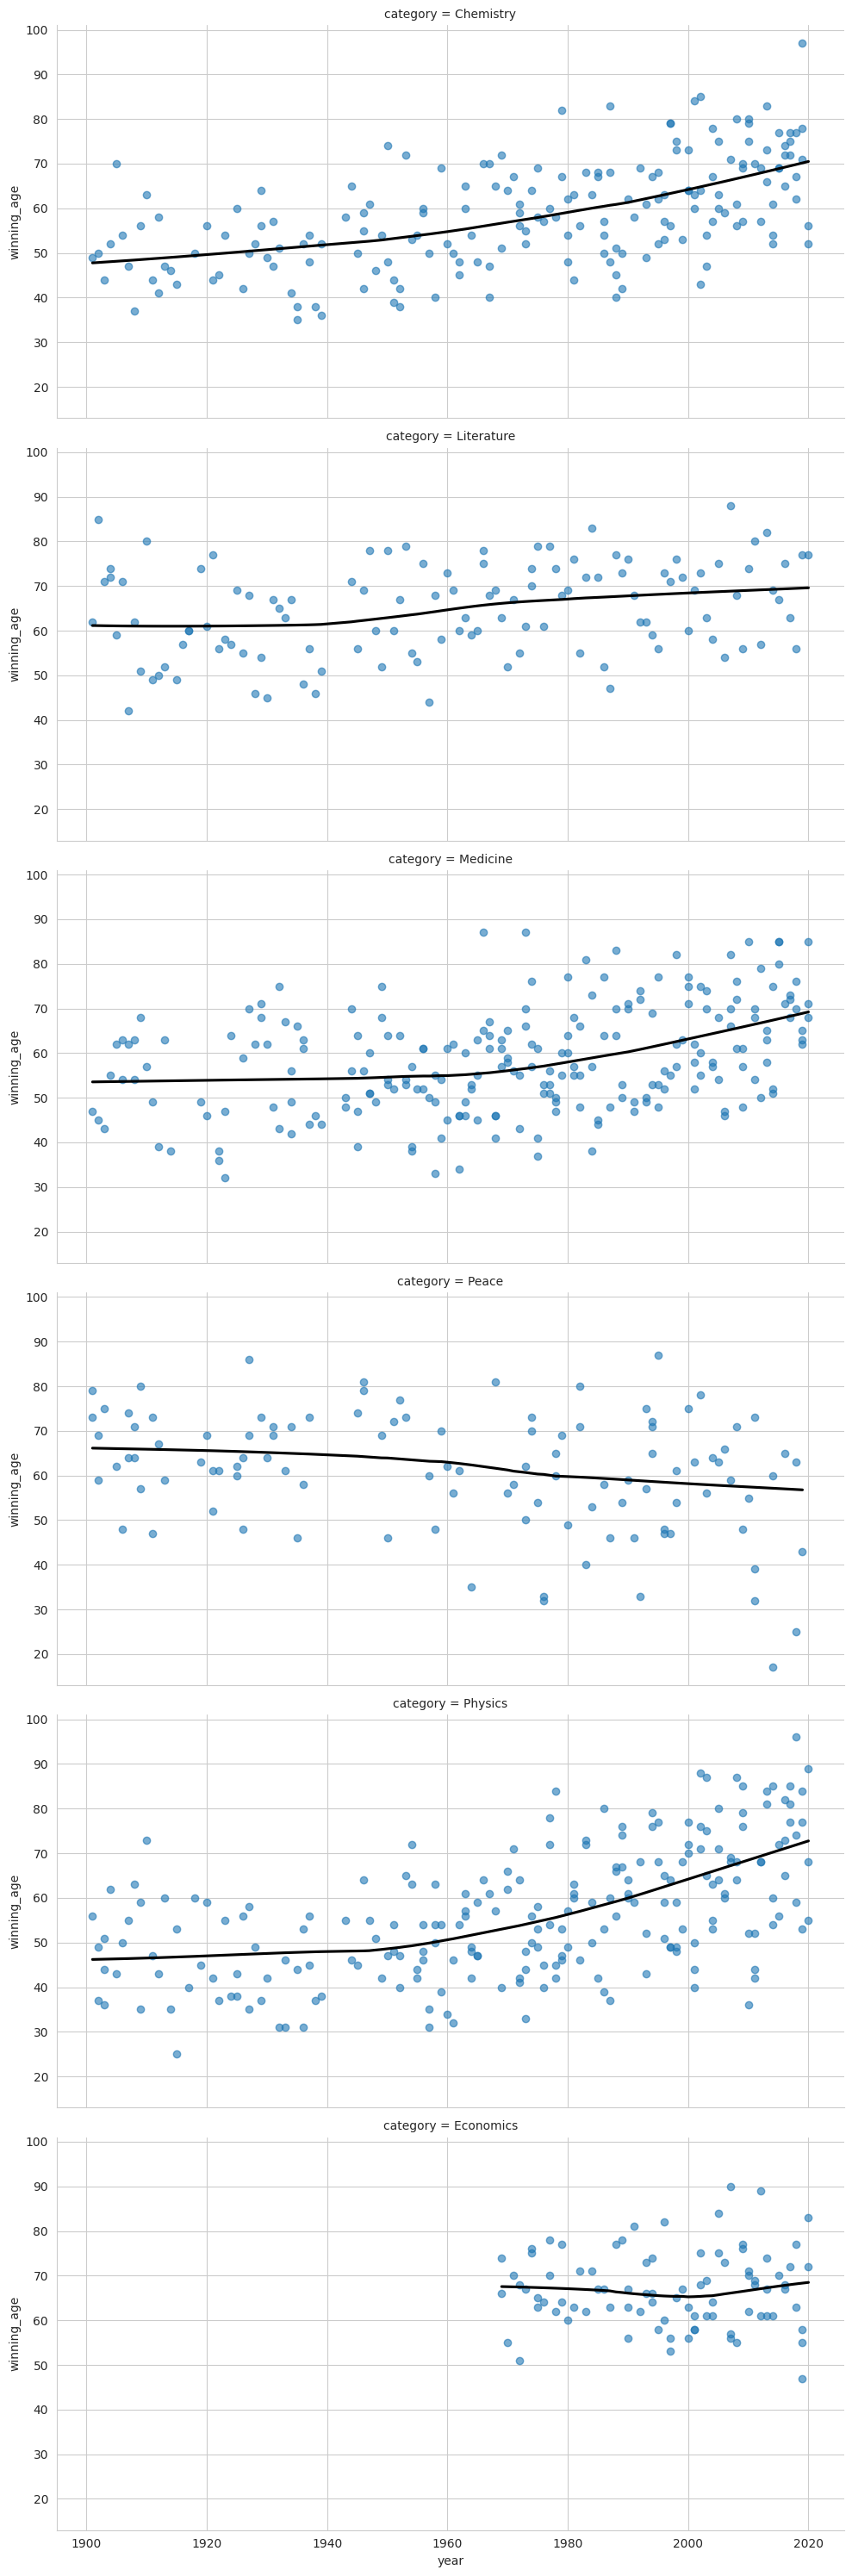

In [ ]:
with sns.axes_style("whitegrid"):
  sns.lmplot(
      data = df_data,
      x = 'year',
      y = 'winning_age',
      row = 'category',
      lowess = True,
      aspect = 2,
      scatter_kws = {'alpha': 0.6},
      line_kws = {'color': 'black'}
  )

plt.show()

**Insight:** With all the graphs for each category placed side by side, a common observation is the shared upward trend in categories such as Chemistry, Physics, Literature, and Medicine. Notably, Physics exhibits the most pronounced upward trend, indicating that Nobel Prize winners in Physics are generally older over time. For instance, laureates in Physics were around 50 years old in the 1960s, while recent winners are more than 70 years old in 2020.

In contrast, the Peace category stands out with an opposite trend, signifying that Peace Nobel Prize winners are becoming younger over time. This suggests a shift in the age profile of recipients in the Peace category.

As for economics, having been introduced in 1969, appears to be the most stable in terms of age trends, as it has a shorter period of observation.

### Combining all of the charts for better visualization

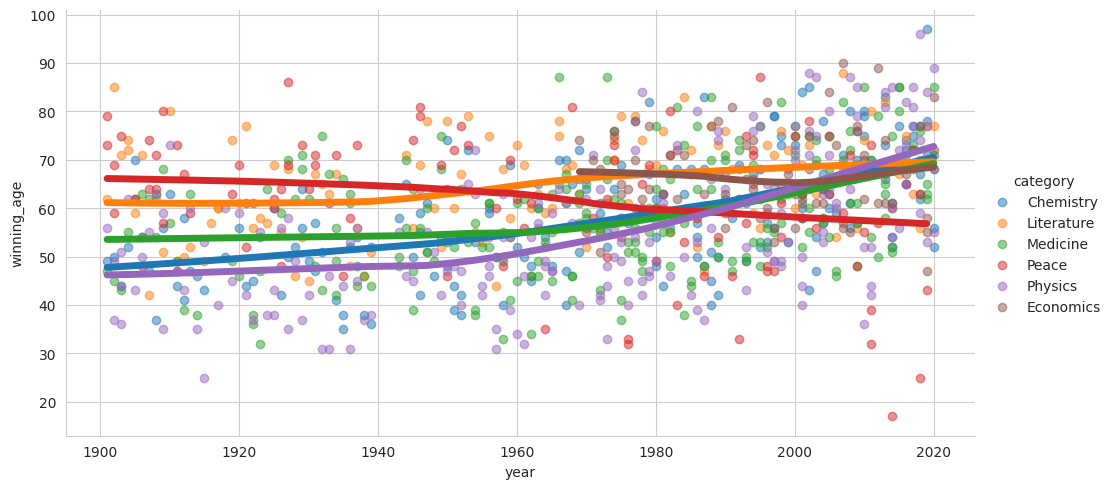

In [ ]:
with sns.axes_style('whitegrid'):
  sns.lmplot(
      data = df_data,
      x = 'year',
      y = 'winning_age',
      hue = 'category',
      lowess = True,
      aspect = 2,
      scatter_kws = {'alpha': 0.5},
      line_kws = {'linewidth': 5}
  )
plt.show()

In [73]:
!jupyter nbconvert --to html /content/Nobel_Prize_Analysis.ipynb

[NbConvertApp] Converting notebook /content/Nobel_Prize_Analysis.ipynb to html
[NbConvertApp] Writing 2580257 bytes to /content/Nobel_Prize_Analysis.html
